# Mission Predictable Hackathon
Using Machine Learning In The Fight Againts The Global Pandemic Covid-19.

In [11]:
# Import nessacary packages.

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
#from pandas_profiling import ProfileReport
import seaborn as sns
pd.set_option('mode.chained_assignment', None)
import numpy as np


In [ ]:
# Create function for Panda's profile.
def profile(x):
    '''fucntion to easily run pandas profile on different dateframes'''
    profile = ProfileReport(x, title="Pandas Profiling Report")
    profile
profile(x)



# Load data for US states by states.

In [5]:
# make df for just states

states_df = pd.read_csv('us-states.csv')
states_df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [6]:
# Create function for Panda's profile.
def profile(x):
    '''fucntion to easily run pandas profile on different dateframes'''
    profile = ProfileReport(x, title="Pandas Profiling Report")
    return profile


In [7]:
profile(states_df)

NameError: name 'ProfileReport' is not defined

# Data inspection and visulization.

In [ ]:
# Create function for Panda's profile.
def profile(x):
    '''fucntion to easily run pandas profile on different dateframes'''
    profile = ProfileReport(x, title="Pandas Profiling Report")
    profile

    


In [ ]:
# Generate report for a quick overview of dataset.

profile = ProfileReport(usa_df, title="Pandas Profiling Report")
profile

In [5]:
# check datatype
states_df.dtypes

date      object
state     object
fips       int64
cases      int64
deaths     int64
dtype: object

# Narrow down dataset to just US Upper MidWestern States

In [14]:
# create new df containing just upper midwestern states
upper_mid = states_df[(states_df['state']=="Minnesota") | (states_df['state'] == 'Michigan') |
                      (states_df['state'] == 'Iowa') | (states_df['state'] == 'North Dakota') | \
                     (states_df['state']=='South Dakota')| (states_df['state'] =='Wisconsin')]
upper_mid.head()

,date,state,fips,cases,deaths
57,2020-02-05,Wisconsin,55,1,0
63,2020-02-06,Wisconsin,55,1,0
69,2020-02-07,Wisconsin,55,1,0
75,2020-02-08,Wisconsin,55,1,0
81,2020-02-09,Wisconsin,55,1,0


In [157]:
# Run report for pattersn in dataset.


# datetime

In [4]:
# convert to datetime
upper_mid['date_dt'] = pd.to_datetime(upper_mid['date'], format ='%Y/%m/%d',errors='ignore')
# create new year column based on date column
upper_mid['year'] = upper_mid['date_dt'].dt.year
# create  new month and day column also based on date coulmn
upper_mid['month'], upper_mid['day'] = (upper_mid['date_dt'].dt.month,upper_mid['date_dt'].dt.day)
# check df
#upper_mid = upper_mid.drop(columns=['date'])
upper_mid.head()
upper_mid.dtypes

C:\Users\lizba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\lizba\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\lizba\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

date               object
state              object
fips                int64
cases               int64
deaths              int64
date_dt    datetime64[ns]
year                int64
month               int64
day                 int64
dtype: object

# Create DF for each Upper Midwestern state

In [15]:
# creating DF's for each UpperMidwestern State

MN = upper_mid[upper_mid['state']=='Minnesota']

In [16]:
MI = upper_mid[upper_mid['state']=='Michigan']
MI.head()

,date,state,fips,cases,deaths
471,2020-03-10,Michigan,26,2,0
512,2020-03-11,Michigan,26,2,0
559,2020-03-12,Michigan,26,12,0
608,2020-03-13,Michigan,26,25,0
659,2020-03-14,Michigan,26,33,0


In [17]:
SD = upper_mid[upper_mid['state']=='South Dakota']

In [18]:
ND = upper_mid[upper_mid['state']=='North Dakota']

In [19]:
WI = upper_mid[upper_mid['state'] == 'Wisonsin']

# Visulize Midwestern Data

In [10]:
# plot for MN
plot_cases(MN)

NameError: name 'plot_cases' is not defined

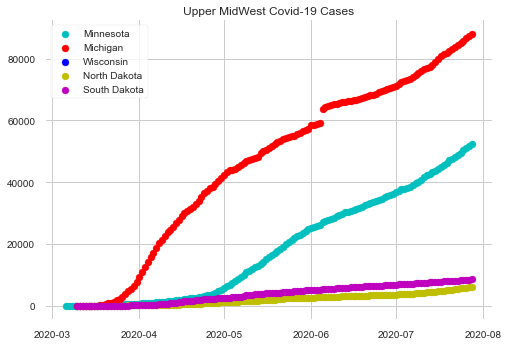

In [132]:
# Plot All UpperMidwestern States

def upper_mid_plot():
    '''function to plot all midwesten cases'''
   
    plt.scatter(MN["date_dt"],MN["cases"],c='c',label='Minnesota')
    #plt.grid(True)
    #plt.title("Minnesota")
    
    plt.scatter(MI["date_dt"],MI["cases"],c='r', label="Michigan")
    #plt.grid(True)
    #plt.title("Michigan")
    
    plt.scatter(WI["date_dt"],WI["cases"],c='b',label="Wisconsin")
    #plt.grid(True)
    #plt.title("Wisconsin")
    
    plt.scatter(ND["date_dt"],ND["cases"],c='y', label = "North Dakota")
    #plt.grid(True)
    #plt.title("North Dakota")
    
    plt.scatter(SD["date_dt"],SD["cases"],c='m', label ="South Dakota")
    plt.grid(True)
    
    plt.title("Upper MidWest Covid-19 Cases")
    plt.legend(loc='upper left')
    
upper_mid_plot()
    
    

# Looking For Expotential (quasi or actual) Growth in covid cases and deaths

In [20]:
# Creating Numpy Array
MI_arr = np.array(MI['cases'])
MI_arr

array([    2,     2,    12,    25,    33,    53,    54,    65,    80,
         334,   548,   787,  1033,  1324,  1791,  2293,  2877,  3655,
        4634,  5486,  6508,  7629,  9292, 10791, 12669, 14225, 15633,
       17129, 18851, 20220, 21375, 22646, 23855, 24496, 25490, 26845,
       27894, 29120, 29954, 30718, 31349, 31929, 32936, 33973, 35253,
       36628, 37302, 38003, 38457, 39469, 40443, 41348, 42348, 43191,
       43803, 43996, 44391, 45079, 45643, 46319, 46735, 47116, 47526,
       47946, 48307, 49489, 49982, 50416, 51054, 51853, 52337, 52988,
       53468, 53865, 54304, 54616, 54816, 55040, 55544, 55944, 56589,
       56848, 57355, 58435, 58680, 58990, 59215, 63744, 64196, 64615,
       64911, 65190, 65377, 65627, 65881, 66024, 66246, 66302, 66466,
       66694, 66980, 67300, 67721, 67873, 68144, 68373, 68711, 69159,
       69473, 69802, 70042, 70356, 70850, 71279, 71853, 72306, 72702,
       73027, 73403, 74011, 74660, 75247, 75871, 76499, 76936, 77354,
       78045, 79081,

In [21]:
MI = MI.reset_index()
MI.head()

,index,date,state,fips,cases,deaths
0,471,2020-03-10,Michigan,26,2,0
1,512,2020-03-11,Michigan,26,2,0
2,559,2020-03-12,Michigan,26,12,0
3,608,2020-03-13,Michigan,26,25,0
4,659,2020-03-14,Michigan,26,33,0


# Creating new column based on Boolean Condition. 

In [22]:
# if cases for one day are more then 1.10 more then the previous day the boolean condition is met. 

MI['high_growth'] = (MI['cases'].iloc[1] >= (MI['cases'].iloc[0] * 1.1)) 
MI.head()

# TODO this works but only for the specified rows. I want to perform this operation for every row.

,index,date,state,fips,cases,deaths,high_growth
0,471,2020-03-10,Michigan,26,2,0,False
1,512,2020-03-11,Michigan,26,2,0,False
2,559,2020-03-12,Michigan,26,12,0,False
3,608,2020-03-13,Michigan,26,25,0,False
4,659,2020-03-14,Michigan,26,33,0,False


In [31]:
a = MI['cases'].tolist()
a
#for i in range(len(MI['cases'].iloc) - 1):
    
for i in range(len(MI['cases'].iloc) - 1):
    

    
    MI['high_growth'] = (MI['cases'].iloc[i + 1] >= (MI['cases'].iloc[i] * 1.1)) 



TypeError: object of type '_iLocIndexer' has no len()

In [ ]:
for i in range(len(a).iloc) - 1):
    

In [ ]:
def loop_with_zip(df):
    temp = 0
    for a, b in zip(MI['cases'], MI['cases']):
        temp += a + b
    return temp



 # Prepare DF for machine learning

In [11]:
# remove uneeded columns
upper_mid = upper_mid.drop(columns=["date","date_dt"])
upper_mid.head()

,state,fips,cases,deaths,year,month,day
57,Wisconsin,55,1,0,2020,2,5
63,Wisconsin,55,1,0,2020,2,6
69,Wisconsin,55,1,0,2020,2,7
75,Wisconsin,55,1,0,2020,2,8
81,Wisconsin,55,1,0,2020,2,9


In [ ]:
# Get Dummies 

In [20]:
upper_mid = pd.get_dummies(upper_mid)
upper_mid.head()


,fips,cases,deaths,year,month,day,state_Iowa,state_Michigan,state_Minnesota,state_North Dakota,state_South Dakota,state_Wisconsin
57,55,1,0,2020,2,5,0,0,0,0,0,1
63,55,1,0,2020,2,6,0,0,0,0,0,1
69,55,1,0,2020,2,7,0,0,0,0,0,1
75,55,1,0,2020,2,8,0,0,0,0,0,1
81,55,1,0,2020,2,9,0,0,0,0,0,1


# Split Into Testing and Training

In [13]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = upper_mid[['fips', 'month','day','state_Iowa','state_Michigan','state_North Dakota','state_South Dakota','state_Wisconsin']]
y = upper_mid["cases"].values.reshape(-1, 1)
print(X.shape, y.shape)


(885, 8) (885, 1)


In [14]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [15]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [16]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [17]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Make Predictions

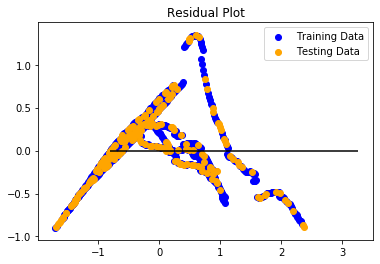

In [18]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [19]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.17350298015220655, R2: 0.786269647901877


In [147]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.05242651570818718, R2: 0.9354181832971465


In [148]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.05356271873938188, R2: 0.9340185469698675


In [149]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.05299603481686109, R2: 0.9347166188657074


In [165]:


 

dataset = [(2, 4, 6, 8),

           (10, 12, 14, 18),

           (20, 22, 24, 26),

           (28, 30, 32, 34)];

 

dataFrame = pd.DataFrame(dataset, columns = ("A", "B", "C", "D" ));

print("Dataset:")

print(dataFrame);

Dataset:
    A   B   C   D
0   2   4   6   8
1  10  12  14  18
2  20  22  24  26
3  28  30  32  34
